#  Analysis on Iris Data 

###    Step- 1 : Importing necessary libraries

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Step- 2 : Reading Iris Dataset 

In [424]:
# Giving a custom column names to data
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Read the CSV file with custom column names
iris = pd.read_csv('bezdekIris.data', header=None, names=column_names)


In [467]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [426]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- From the above observation we don't have any missing values in the dataset

In [427]:
# checking the shape of dataset
iris.shape

(150, 5)

In [428]:
# checking the dataset for null values
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [429]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- From above code we observe that we dont have any null values or nan values in the data set 

# step- 3 Data Visulization

<Axes: title={'center': 'Species Count'}, xlabel='Species', ylabel='count'>

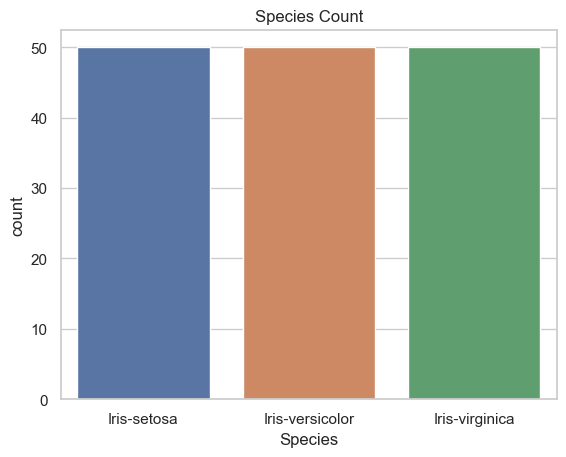

In [430]:
plt.title('Species Count')
sns.countplot(x=iris['Species'])

<Axes: title={'center': 'Comparison on various species based on Sepal length and width'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

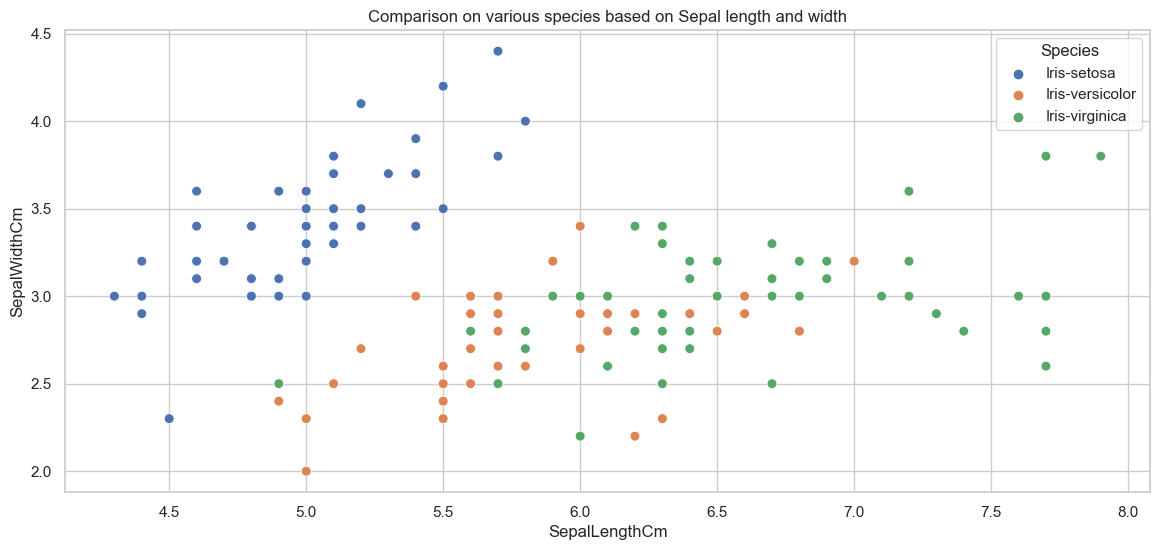

In [431]:
plt.figure(figsize=(14,6))

plt.title('Comparison on various species based on Sepal length and width')

sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'], s=50)

- From the plot above, we can say;

- Iris-setosa species have smaller sepal lengths and higher sepal width.
- Iris-versicolor species lies in the middle for both its sepal length and sepal width.
- Iris-virginica species have higher sepal length and smaller sepal width.

<Axes: title={'center': 'Comparison on various species based on Sepal length and width'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

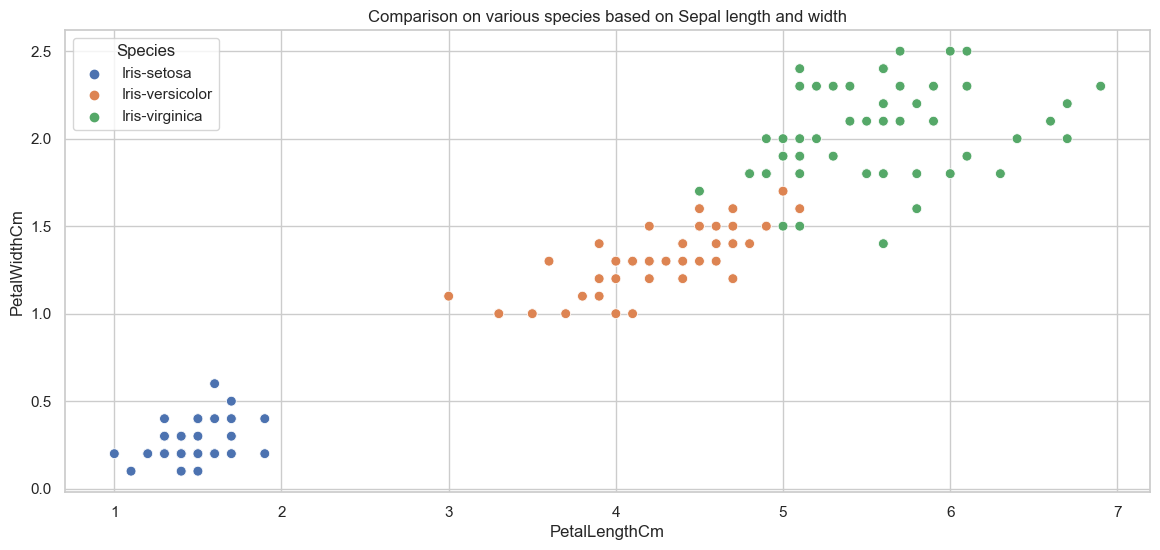

In [432]:
plt.figure(figsize=(14,6))

plt.title('Comparison on various species based on Sepal length and width')

sns.scatterplot(x=iris['PetalLengthCm'], y=iris['PetalWidthCm'], hue=iris['Species'], s=50)

- From the plot above, we can say;

- Iris-setosa species have the smallest petal length and petal width.
- Iris-versicolor species have average petal length and petal width.
- Iris-virginica species have the highest petal length and petal width.

<Axes: >

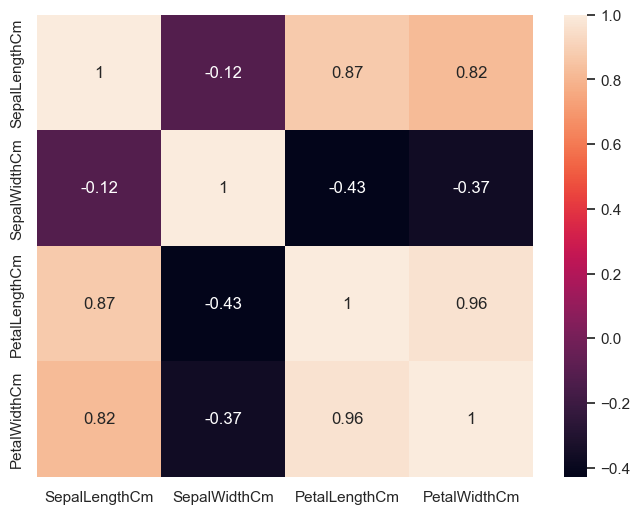

In [433]:
#to check for correlation between variables
plt.figure(figsize=(8,6))
iris_corr = iris.iloc[:,0:4].corr()
sns.heatmap(iris_corr, annot=True)

- The plot above is a correlation matrix. It helps us gain a better understanding of the correlation between the variables in the dataset. From the plot, we see that the petal length and petal width are highly correlated, as well as the Petal width and sepal length have a good correlation.

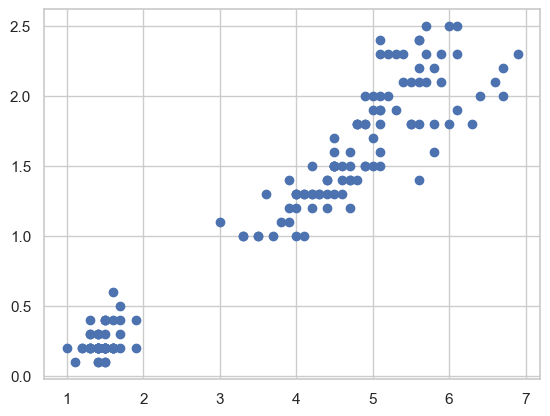

In [434]:
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm']);

# step- 3: Transforming the data

In [436]:
from sklearn.preprocessing import OneHotEncoder

In [437]:
ohe = OneHotEncoder(drop="first")

In [438]:
ohe_array = ohe.fit_transform(iris[["Species"]]).toarray()

In [439]:
label = ohe.categories_

In [440]:
label

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [441]:
labels = ["Iris-versicolor","Iris-virginica"]

In [442]:
labels

['Iris-versicolor', 'Iris-virginica']

In [443]:
ohe_encoded = pd.DataFrame(ohe_array,columns=labels,dtype = int)

In [444]:
ohe_encoded

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


In [445]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [446]:
iris = pd.concat([iris,ohe_encoded],axis=1).drop("Species",axis=1)

In [447]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [448]:
X = iris.iloc[:,0:4]
y= iris.iloc[:,4:6]

In [449]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [450]:
y.head()

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Standardize the features


In [451]:
from sklearn.preprocessing import StandardScaler

In [452]:
scaler = StandardScaler()

In [453]:
X_scaled = scaler.fit_transform(X)

# Model Bulding

In [454]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [460]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3,)
kmeans.fit(X_scaled)

# Get cluster assignments
labels = kmeans.labels_

# Add cluster labels to the original dataset
iris_df = pd.DataFrame(iris, columns=iris.columns)
iris_df['cluster'] = labels


In [461]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica,cluster
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


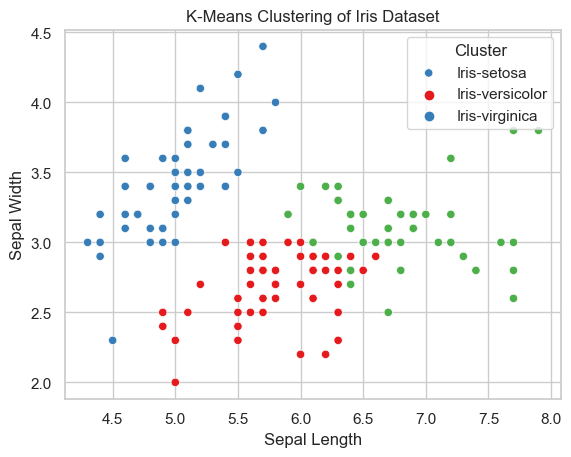

In [465]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='cluster', data=iris_df, palette='Set1', legend='full')

plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend(title='Cluster', labels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.show()


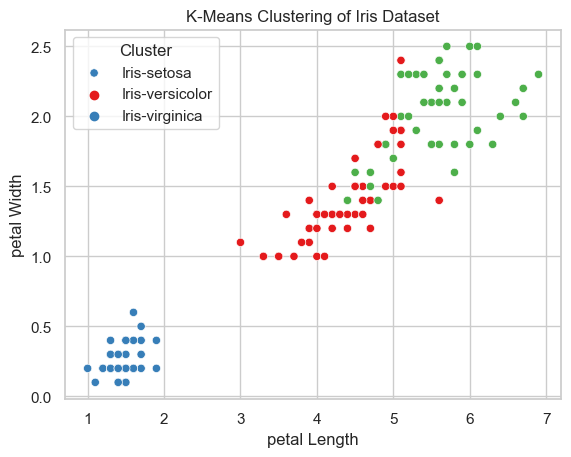

In [468]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='cluster', data=iris_df, palette='Set1', legend='full')

plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('petal Length')
plt.ylabel('petal Width')

plt.legend(title='Cluster', labels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.show()